In [1]:
import pandas as pd
import xlrd
import numpy as np

# 서울시 자치구 년도별 CCTV 설치 현황 http://data.seoul.go.kr/dataList/datasetView.do?infId=OA-2734&srvType=S&serviceKind=1
seoul_cctv = pd.read_csv("C:\\ezen_tensorflow\\seoul_cctv\\seoul_cctv\\seoul_cctv.csv")

# 서울시 구별 주민등록 인구 https://data.seoul.go.kr/dataList/datasetView.do?serviceKind=2&infId=419&srvType=S&stcSrl=419
seoul_pop = pd.read_excel("C:\\ezen_tensorflow\\seoul_cctv\\seoul_cctv\\seoul_pop.xls", encoding ='utf-8', header=2, usecols='B,D,G,J,N')

In [2]:
seoul_cctv_idx = seoul_cctv.columns

In [3]:
# inplace = True 는 실제변수의 내용
seoul_cctv.rename(columns={seoul_cctv.columns[0]:'구별'}, inplace = True)

seoul_pop.rename(columns={seoul_pop.columns[0]:'구별',
                         seoul_pop.columns[1]:'인구수',
                          seoul_pop.columns[2]:'한국인',
                          seoul_pop.columns[3]:'외국인',
                          seoul_pop.columns[4]:'고령자'
                         }, inplace = True)

In [4]:
seoul_cctv.sort_values(by='소계', ascending=True).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [5]:
seoul_cctv.sort_values(by='소계', ascending=True).tail()

,구별,소계,2013년도 이전,2014년,2015년,2016년
21,은평구,2108,1138,224,278,468
4,관악구,2109,846,260,390,613
14,서초구,2297,1406,157,336,398
18,양천구,2482,1843,142,30,467
0,강남구,3238,1292,430,584,932


In [6]:
seoul_pop.drop([0], inplace=True)
seoul_pop.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,163086,153396,9690,26622
2,중구,135258,125815,9443,21902
3,용산구,245087,229391,15696,37443
4,성동구,317197,309251,7946,42581
5,광진구,369999,355032,14967,45202


In [7]:
seoul_pop['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

### NaN 값 제거

In [8]:
seoul_pop[seoul_pop['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자


### 외국인 비율과 고령자 비율계산

In [9]:
seoul_pop['외국인비율'] = 100 * seoul_pop['외국인']/seoul_pop['인구수']
seoul_pop['고령자비율'] = 100 * seoul_pop['고령자']/seoul_pop['인구수']
seoul_pop.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,163086,153396,9690,26622,5.941650,16.323903
2,중구,135258,125815,9443,21902,6.981472,16.192758
3,용산구,245087,229391,15696,37443,6.404256,15.277432
4,성동구,317197,309251,7946,42581,2.505068,13.424150
5,광진구,369999,355032,14967,45202,4.045146,12.216790


In [10]:
data_result = pd.merge(seoul_cctv, seoul_pop, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,549255,544257,4998,66412,0.909960,12.091287
1,강동구,1010,379,99,155,377,434992,430705,4287,58280,0.985535,13.397948
2,강북구,831,369,120,138,204,324276,320576,3700,57741,1.141003,17.806128
3,강서구,911,388,258,184,81,605068,598416,6652,78814,1.099381,13.025643
4,관악구,2109,846,260,390,613,521685,503956,17729,71840,3.398411,13.770762


In [11]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,2013년도 이전,2014년,2015년,2016년,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,,,,
강남구,3238,1292,430,584,932,549255,544257,4998,66412,0.909960,12.091287
강동구,1010,379,99,155,377,434992,430705,4287,58280,0.985535,13.397948
강북구,831,369,120,138,204,324276,320576,3700,57741,1.141003,17.806128
강서구,911,388,258,184,81,605068,598416,6652,78814,1.099381,13.025643
관악구,2109,846,260,390,613,521685,503956,17729,71840,3.398411,13.770762


##### 상관계수의 절대값이 
##### 0.1 이하면 거의 무시
##### 0.3 이하면 약한 상관관계
##### 0.7 이하면 뚜렷한 상관관계
##### 상관관계를 계산하는 명령이 numpy에 있는 corrcoef 명령
##### 이명령의 결과는 행렬로 나타남
##### 주대각선을 기준으로 대칭인 행결이고
##### 대각선을 빼고 다른 값을 읽도록 함

In [12]:
np.corrcoef(data_result['고령자비율'], data_result['소계'])

array([[ 1.        , -0.27533083],
       [-0.27533083,  1.        ]])

In [13]:
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.       , 0.2242953],
       [0.2242953, 1.       ]])

In [14]:
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.04796912],
       [-0.04796912,  1.        ]])

##### cctv와 고령자비율은 약한 음의 상관관계
##### cctv와 외국인비율은 상관관계 없음
##### cctv와 인구수와 약한 상의 상관관계를 가짐

## 시각화

In [15]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform

### 한글깨짐 방지

In [16]:
path='C:\\Windows\\Fonts\\malgun.TTF'
font_name = font_manager.FontProperties(fname=path).get_name()

In [17]:
font_name

'Malgun Gothic'

In [18]:
rc('font', family = font_name)

In [19]:
data_result['CCTV비율'] = data_result['소계']* 100 /data_result['인구수'] 
data_result['CCTV비율']

구별
강남구     0.589526
강동구     0.232188
강북구     0.256263
강서구     0.150562
관악구     0.404267
광진구     0.237298
구로구     0.428929
금천구     0.534160
노원구     0.284175
도봉구     0.240532
동대문구    0.510788
동작구     0.319176
마포구     0.254524
서대문구    0.388841
서초구     0.520226
성동구     0.418352
성북구     0.367237
송파구     0.160485
양천구     0.528147
영등포구    0.316305
용산구     0.855207
은평구     0.432101
종로구     0.992728
중구      0.756332
중랑구     0.223929
Name: CCTV비율, dtype: float64

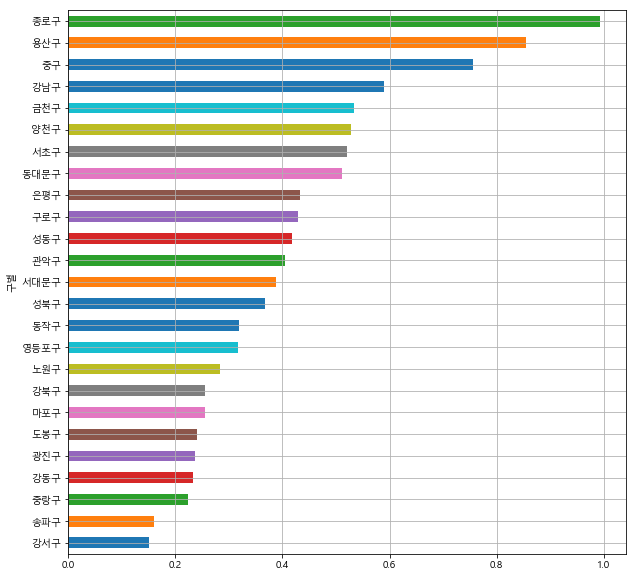

In [20]:
data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

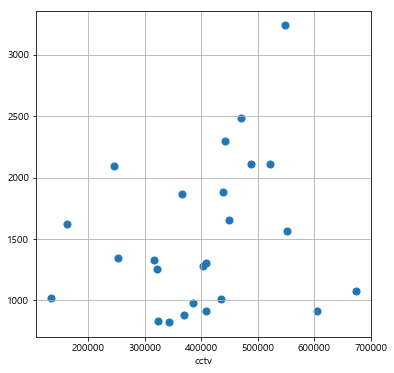

In [21]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'],data_result['소계'],s=50)
plt.xlabel('인구수')
plt.xlabel('cctv')
plt.grid()
plt.show()

### cctv와 인구수는 양의 상관관계이므로 직선을 그릴 수 있다.

In [22]:
fp1 = np.polyfit(data_result['인구수'],data_result['소계'],1)
# polyfit은 직선구하기 명령
fp1

array([1.08180882e-03, 1.07963746e+03])

In [23]:
f1 = np.poly1d(fp1)
# y 축 데이터
f1

poly1d([1.08180882e-03, 1.07963746e+03])

In [24]:
fx = np.linspace(100000, 700000, 100) # x 축 데이터

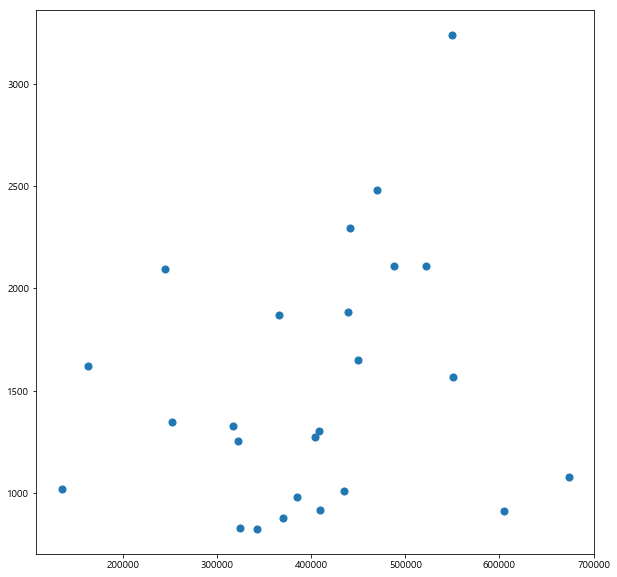

In [25]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'],data_result['소계'], s= 50)

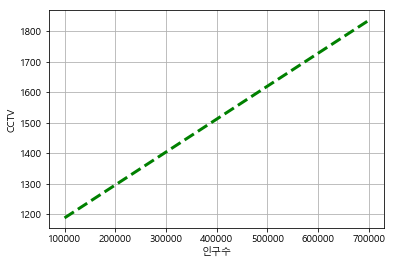

In [26]:
plt.plot(fx, f1(fx), ls = 'dashed', lw =3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

### 이 데이터에서 직선이 전체 데이터의 대표값 역할을 한다면 인구수가 300000 일때 cctv는 1100대 정도여야 한다는 결론을 내리게 된다.\
### 오차를 계산할 수 있는 코드를 만들고, 오차가 큰 순으로 데이터를 정렬

In [27]:
fp1 = np.polyfit(data_result['인구수'],data_result['소계'],1)
f1 = np.poly1d(fp1)
fx = np.linspace(100000,700000,100)

In [28]:
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))
df_sort = data_result.sort_values(by='오차', ascending = False)

In [29]:
df_sort.head()

,소계,2013년도 이전,2014년,2015년,2016년,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,,,,
강남구,3238,1292,430,584,932,549255,544257,4998,66412,0.909960,12.091287,0.589526,1564.173631
양천구,2482,1843,142,30,467,469945,466121,3824,57442,0.813712,12.223132,0.528147,893.971889
강서구,911,388,258,184,81,605068,598416,6652,78814,1.099381,13.025643,0.150562,823.205365
용산구,2096,1368,218,112,398,245087,229391,15696,37443,6.404256,15.277432,0.855207,751.225257
서초구,2297,1406,157,336,398,441539,437407,4132,54887,0.935818,12.430838,0.520226,739.701750


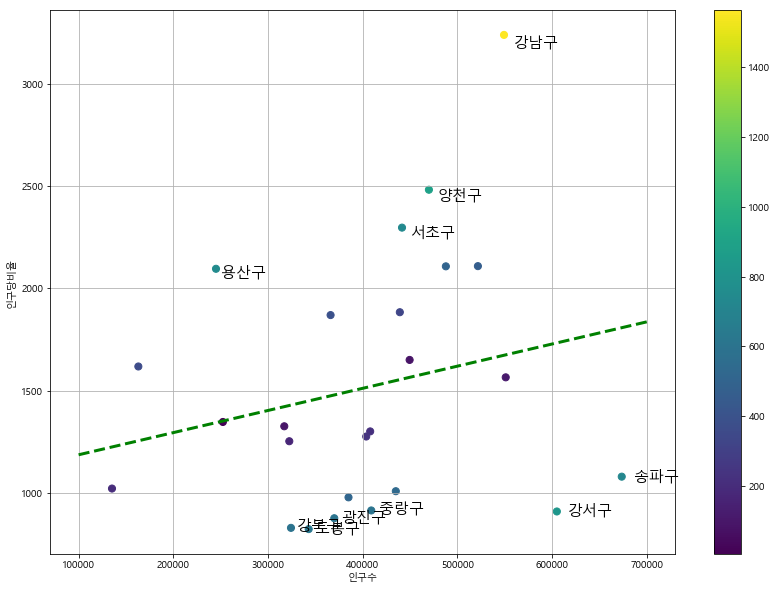

In [30]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'], c = data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls = 'dashed', lw =3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, df_sort.index[n], fontsize=15)


plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()